## Course 1 Getting Started with TensorFlow 2 - Week 3 Validation Sets

---

#### 1.3.2 Model Validation

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [3]:
'''
model = Sequential()
model.add(Dense(128, activation = 'tanh'))
model.add(Dense(2))

opt = Adam(learning_rate = 0.05)
model.compile(optimizer = opt, loss = 'mse', metrics = ['mape'])

history = model.fit(inputs, targets, validation_split = 0.2) # 20% of inputs would be in the validation set

print(history.history.keys()) # dict_keys(['loss', 'mape', 'val_loss', 'val_mape'])
'''

"\nmodel = Sequential()\nmodel.add(Dense(128, activation = 'tanh'))\nmodel.add(Dense(2))\n\nopt = Adam(learning_rate = 0.05)\nmodel.compile(optimizer = opt, loss = 'mse', metrics = ['mape'])\n\nhistory = model.fit(inputs, targets, validation_split = 0.2) # 20% of inputs would be in the validation set\n\nprint(history.history.keys()) # dict_keys(['loss', 'mape', 'val_loss', 'val_mape'])\n"

- Other ways to make validation sets

In [4]:
# 1
'''
import tensorflow as tf

(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.fashion_data.load_data()

model.fit(X_train, Y_train, validation_data = (X_test, Y_test))
'''

'\nimport tensorflow as tf\n\n(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.fashion_data.load_data()\n\nmodel.fit(X_train, Y_train, validation_data = (X_test, Y_test))\n'

In [5]:
# 2
'''
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=p1)
model.fit(X_train, y_train, validation_split=p2)
'''

'\nfrom sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=p1)\nmodel.fit(X_train, y_train, validation_split=p2)\n'

* Coding Tutorial

In [6]:
import tensorflow as tf

    - Validation Sets

In [7]:
# Load the Data
from sklearn.datasets import load_diabetes

diabetes_dataset = load_diabetes()
print(diabetes_dataset["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [8]:
print(diabetes_dataset.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [9]:
# Save the input and target variables

data = diabetes_dataset['data']
targets = diabetes_dataset['target']

In [10]:
# Normalize the target data (this will make clearer training canvas)
targets = (targets - targets.mean(axis=0)) / targets.std()

In [11]:
# Split the data into train and test sets

from sklearn.model_selection import train_test_split

train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.1)

print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)
print(test_targets.shape)

(397, 10)
(45, 10)
(397,)
(45,)


    - Train a feedforward neural network model

In [12]:
# Build the model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
    model = Sequential([
        Dense(128, activation = 'relu', input_shape = (train_data.shape[1],)),
        Dense(128, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(1)
    ])
    return model

model = get_model()

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 1)                 1

In [14]:
# Compile the model

model.compile(
    optimizer = 'adam',
    loss ='mse',
    metrics=['mae']
)

In [15]:
# Train the model, with some of the data reserved for validation

history = model.fit(train_data, train_targets, epochs = 100, validation_split = 0.15, batch_size=64, verbose=False)

In [16]:
# Evaluate the model on the test set

model.evaluate(test_data, test_targets, verbose=2)

2/2 - 0s - loss: 0.7468 - mae: 0.6443 - 20ms/epoch - 10ms/step


[0.7468020915985107, 0.6443070769309998]

    - Plot the learning curves

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

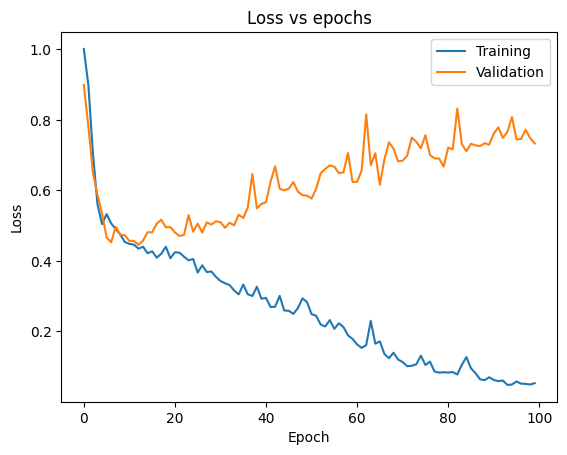

In [18]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc = 'upper right')
plt.show()

#### 1.3.3 Model Regularisation

In [19]:
'''
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation = 'relu',
          kernel_regularizer = tf.keras.regularizers.l1_l2(l1=0.005, l2 = 0.001),
          bias_regularizer = tf.keras.regularizers.l2(0.001)),
    Dense(1, activation = 'sigmoid')
])

model.compile(optimizer='adadelta', loss = 'binary_crossentropy', metrics=['acc'])
model.fit(inputs, targets, validation_split=0.25)
'''

"\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Dense\n\nmodel = Sequential([\n    Dense(64, activation = 'relu',\n          kernel_regularizer = tf.keras.regularizers.l1_l2(l1=0.005, l2 = 0.001),\n          bias_regularizer = tf.keras.regularizers.l2(0.001)),\n    Dense(1, activation = 'sigmoid')\n])\n\nmodel.compile(optimizer='adadelta', loss = 'binary_crossentropy', metrics=['acc'])\nmodel.fit(inputs, targets, validation_split=0.25)\n"

In [20]:
'''
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation = 'relu',
          kernel_regularizer = tf.keras.regularizers.l1_l2(l1=0.005, l2 = 0.001),
          bias_regularizer = tf.keras.regularizers.l2(0.001)),
    Dense(1, activation = 'sigmoid')
])

model.compile(optimizer='adadelta', loss = 'binary_crossentropy', metrics=['acc'])  # Trining mode, with dropout
model.evaluate(val_inputs, val_targets)                                             # Testing mode, no dropout
model.fit(inputs, targets, validation_split=0.25)                                   # Testing mode, no dropout
'''

"\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Dense\n\nmodel = Sequential([\n    Dense(64, activation = 'relu',\n          kernel_regularizer = tf.keras.regularizers.l1_l2(l1=0.005, l2 = 0.001),\n          bias_regularizer = tf.keras.regularizers.l2(0.001)),\n    Dense(1, activation = 'sigmoid')\n])\n\nmodel.compile(optimizer='adadelta', loss = 'binary_crossentropy', metrics=['acc'])  # Trining mode, with dropout\nmodel.evaluate(val_inputs, val_targets)                                             # Testing mode, no dropout\nmodel.fit(inputs, targets, validation_split=0.25)                                   # Testing mode, no dropout\n"

- Adding regularisation with weight decay and dropout

In [21]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [22]:
def get_regularized_model(wd, rate):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(train_data.shape[1],), kernel_regularizer = regularizers.l2(wd)),
        Dropout(rate),
        Dense(128, activation = 'relu', kernel_regularizer = regularizers.l2(wd)),
        Dropout(rate),
        Dense(128, activation = 'relu', kernel_regularizer = regularizers.l2(wd)),
        Dropout(rate),
        Dense(128, activation = 'relu', kernel_regularizer = regularizers.l2(wd)),
        Dropout(rate),
        Dense(128, activation = 'relu', kernel_regularizer = regularizers.l2(wd)),
        Dropout(rate),
        Dense(128, activation = 'relu', kernel_regularizer = regularizers.l2(wd)),
        Dropout(rate),
        Dense(1)
    ])
    return model

In [23]:
# Re-build the model with weight decay and dropout layers
model = get_regularized_model(1e-5, 0.3)

In [24]:
# Compile the model
model.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics=['mae']
)

In [25]:
# Train the model, with some of the data reserved for validation
history = model.fit(train_data, train_targets, epochs=100, validation_split=0.15, batch_size=64, verbose=False)

In [26]:
# Evaluate the model on the test set
model.evaluate(test_data, test_targets, verbose=2)

2/2 - 0s - loss: 0.5443 - mae: 0.5700 - 24ms/epoch - 12ms/step


[0.5443252325057983, 0.570004940032959]

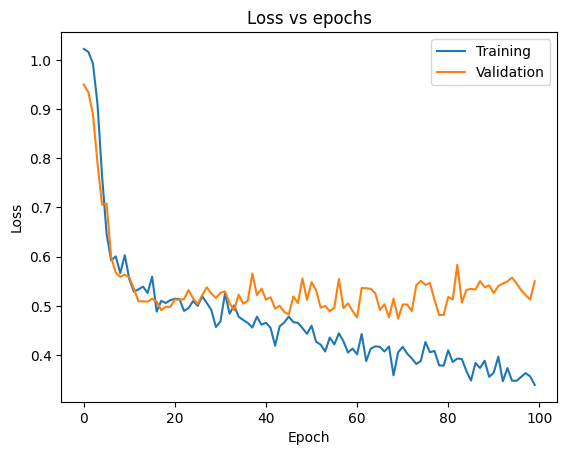

In [27]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc = 'upper right')
plt.show()

#### 1.3.4 Batch Normalisation

In [28]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [29]:
# Load the dataset

from sklearn.datasets import load_diabetes
diabetes_dataset = load_diabetes()

In [30]:
# Save the input and target variables

from sklearn.model_selection import train_test_split

data = diabetes_dataset['data']
targets = diabetes_dataset['target']

In [31]:
# Normalise the target data (this will make clearer training curves)

targets = (targets - targets.mean(axis=0)) / targets.std()

In [32]:
# Split the dataset into training and test datasets

train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.1)

- Batch Normalization

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization, Dropout

In [34]:
model = Sequential([
    Dense(64, input_shape = [train_data.shape[1],], activation = 'relu'),
    BatchNormalization(),
    Dropout(0,5),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation = 'relu')
])

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 64)                704       
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 256)              

Recall that there are some parameters and hyperparameters associated with batch normalisation.

1. The hyperparameter **momentum** is the weighting given to the previous running mean when re-computing it with an extra minibatch. By **default**, it is set to 0.99.

2. The hyperparameter **$\epsilon$** is used for numeric stability when performing the normalisation over the minibatch. By **default** it is set to 0.001.

3. The parameters **$\beta$** and **$\gamma$** are used to implement an affine transformation after normalisation. By **default**, $\beta$ is an all-zeros vector, and $\gamma$ is an all-ones vector.

- Customizing parameters

In [36]:
# Add a customized batch normalisation layer

model.add(tf.keras.layers.BatchNormalization(
    momentum = 0.95,
    epsilon = 0.005,    axis = -1,
    beta_initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05),
    gamma_initializer = tf.keras.initializers.Constant(value=0.9)
))

In [37]:
# Add the output layer
model.add(Dense(1))

- Compile and fit the model

In [38]:
# Compile the model

model.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics=['mae']
)

In [39]:
# Train the model

history = model.fit(train_data, train_targets, epochs=100, validation_split=0.15, batch_size=64, verbose=False)

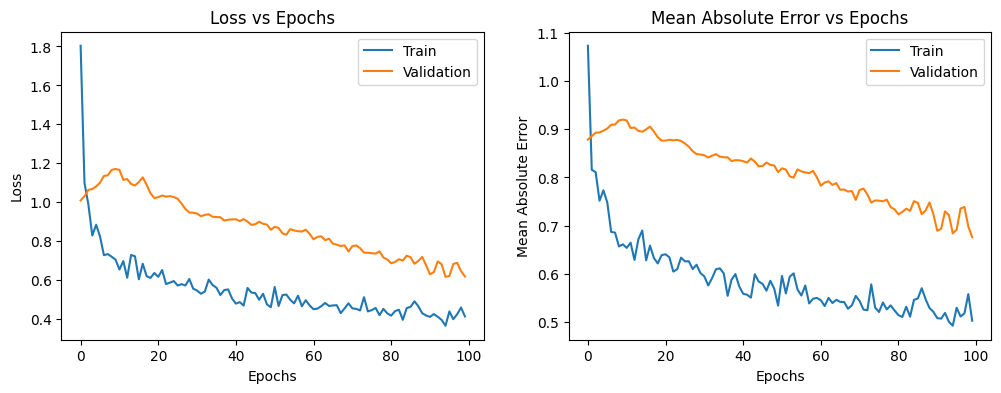

In [40]:
# Plot the learning curves 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

frame = pd.DataFrame(history.history)
epochs = np.arange(len(frame))

fig = plt.figure(figsize=(12,4))

# Loss plot
ax = fig.add_subplot(121)
ax.plot(epochs, frame['loss'], label="Train")
ax.plot(epochs, frame['val_loss'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Loss vs Epochs")
ax.legend()

# Accuracy plot
ax = fig.add_subplot(122)
ax.plot(epochs, frame['mae'], label="Train")
ax.plot(epochs, frame['val_mae'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Mean Absolute Error")
ax.set_title("Mean Absolute Error vs Epochs")
ax.legend()

#### 1.3.5 Callbacks

In [41]:
'''
from tensorflow.keras.callbacks import Callback

class my_callback(Callback):

    def on_train_begin (self, logs = None):
        # Do something at the start of training
    
    def on_train_batch_begin (self, batch, logs=None):
        # Do something before processing a batch during training
    
    def on_epoch_end(self, epoch, logs=None):
        # D something at the end of every epoch

model.fit(X_train, y_train, epochs = 5, callbacks = [my_callback()])
'''

'\nfrom tensorflow.keras.callbacks import Callback\n\nclass my_callback(Callback):\n\n    def on_train_begin (self, logs = None):\n        # Do something at the start of training\n    \n    def on_train_batch_begin (self, batch, logs=None):\n        # Do something before processing a batch during training\n    \n    def on_epoch_end(self, epoch, logs=None):\n        # D something at the end of every epoch\n\nmodel.fit(X_train, y_train, epochs = 5, callbacks = [my_callback()])\n'

- Example training callback

In [42]:
# Write a custom callback

from tensorflow.keras.callbacks import Callback

class TrainingCallback(Callback):

    def on_train_begin(self, logs = None):
        print("Training started...")

    def on_epoch_begin(self, epoch, logs = None):
        print(f'Starting epoch {epoch}')
    
    def on_train_batch_begin(self, batch, logs=None):
        print(f"Training: Starting batch {batch}")

    def on_train_batchh_end(self, batch, logs=None):
        print(f"Training: Finished batch {batch}")

    def on_epoch_end(self, epoch, logs=None):
        print(f"Finished epoch {epoch}")

    def on_train_end(self, logs=None):
        print("Finished Training!")

In [43]:
# Re-build the model

model = get_regularized_model(1e-5, 0.3)

In [44]:
# Compile the model

model.compile(optimizer= 'adam', loss = 'mae')

- Training the model with the callback

In [45]:
# Train the model, with some of the data reserved for validation

model.fit(train_data, train_targets, epochs=3, batch_size=128, verbose=False, callbacks = [TrainingCallback()])

Training started...
Starting epoch 0
Training: Starting batch 0
Training: Starting batch 1
Training: Starting batch 2
Training: Starting batch 3
Finished epoch 0
Starting epoch 1
Training: Starting batch 0
Training: Starting batch 1
Training: Starting batch 2
Training: Starting batch 3
Finished epoch 1
Starting epoch 2
Training: Starting batch 0
Training: Starting batch 1
Training: Starting batch 2
Training: Starting batch 3
Finished epoch 2
Finished Training!


In [46]:
class TestingCallback(Callback):

    def on_test_begin(self, logs = None):
        print("Testing started...")
    
    def on_test_batch_begin(self, batch, logs=None):
        print(f"Testing: Starting batch {batch}")

    def on_train_batchh_end(self, batch, logs=None):
        print(f"Training: Finished batch {batch}")

    def on_test_end(self, logs=None):
        print("Finished Testing!")

In [47]:
# Evaluate the model

model.evaluate(test_data, test_targets, verbose=False, callbacks=[TestingCallback()])

Testing started...
Testing: Starting batch 0
Testing: Starting batch 1
Finished Testing!


0.8530585169792175

In [48]:
class PredictionCallback(Callback):

    def on_predict_begin(self, logs = None):
        print("Prediction started...")
    
    def on_predict_batch_begin(self, batch, logs=None):
        print(f"Prediction: Starting batch {batch}")

    def on_predict_batchh_end(self, batch, logs=None):
        print(f"Prediction: Finished batch {batch}")

    def on_predict_end(self, logs=None):
        print("Finished Prediction!")

In [49]:
# Make prediction with the model
model.predict(test_data, verbose=False, callbacks=[PredictionCallback()])

Prediction started...


Prediction: Starting batch 0
Prediction: Starting batch 1
Finished Prediction!


array([[-0.00956275],
       [ 0.05063814],
       [ 0.02357841],
       [-0.05841344],
       [-0.03036746],
       [-0.08579004],
       [ 0.02173472],
       [-0.06744467],
       [ 0.0095718 ],
       [-0.03720298],
       [-0.06174841],
       [-0.00532178],
       [ 0.05054968],
       [ 0.08209357],
       [ 0.02858031],
       [-0.07127596],
       [ 0.02068443],
       [-0.07061911],
       [ 0.01756642],
       [-0.0210906 ],
       [-0.00380071],
       [ 0.00463603],
       [-0.06115768],
       [-0.0810885 ],
       [-0.06631719],
       [-0.07099684],
       [ 0.00117617],
       [ 0.02285853],
       [-0.08032784],
       [ 0.05159554],
       [-0.08310528],
       [-0.08074623],
       [ 0.07070342],
       [ 0.00505191],
       [-0.00515191],
       [ 0.02464341],
       [ 0.06396732],
       [-0.06248059],
       [-0.0633679 ],
       [-0.00166016],
       [-0.04451517],
       [-0.07238422],
       [-0.06110109],
       [-0.07283195],
       [ 0.02079169]], dtype=flo

#### 1.3.6 The logs dictionary $\rarr$ for customizing our callbacks

In [50]:
import tensorflow as tf
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

diabetes_dataset = load_diabetes()
data = diabetes_dataset['data']
targets = diabetes_dataset['target']

train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.1)

In [51]:
# Build the model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation = 'relu', input_shape = (train_data.shape[1],)),
    Dense(64,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)        
])

In [52]:
# Compile the model

model.compile(loss = 'mse', optimizer= 'adam', metrics=['mae'])

- Defining a custom Callback

In [53]:
# Create the custom callback
from tensorflow.keras.callbacks import Callback

class LossAndMetricCallback(Callback):

    # Print the loss after every second batch in the training set
    def on_train_batch_end(self, batch, logs=None):
        if batch %2 ==0:
            print('\n After batch {}, the loss is {:7.2f}.'.format(batch, logs['loss']))
    
    # Print the loss after each batch in the test set
    def on_test_batch_end(self, batch, logs=None):
        print('\n After batch {}, the loss is {:7.2f}.'.format(batch, logs['loss']))

    # Print the loss and mean absolute error after each epoch
    def on_epoch_end(self, epoch, logs=None):
        print('Epoch {}: Average loss is {:7.2f}, mean absolute error is {:7.2f}.'.format(epoch, logs['loss'], logs['mae']))
    
    # Notify the user when prediction has finished on each batch
    def on_predict_batch_end(self,batch, logs=None):
        print("Finished prediction on batch {}!".format(batch))

In [54]:
# Train the model

history = model.fit(train_data, train_targets, epochs = 20, batch_size=100, callbacks=[LossAndMetricCallback()], verbose=False)


 After batch 0, the loss is 27714.01.

 After batch 2, the loss is 29585.04.
Epoch 0: Average loss is 29460.71, mean absolute error is  153.19.

 After batch 0, the loss is 30659.09.

 After batch 2, the loss is 28873.80.
Epoch 1: Average loss is 29277.96, mean absolute error is  152.66.

 After batch 0, the loss is 32248.33.

 After batch 2, the loss is 30043.11.
Epoch 2: Average loss is 29020.76, mean absolute error is  151.91.

 After batch 0, the loss is 27838.90.

 After batch 2, the loss is 29694.89.
Epoch 3: Average loss is 28648.02, mean absolute error is  150.82.

 After batch 0, the loss is 27332.88.

 After batch 2, the loss is 28865.34.
Epoch 4: Average loss is 28138.53, mean absolute error is  149.35.

 After batch 0, the loss is 29529.87.

 After batch 2, the loss is 28482.15.
Epoch 5: Average loss is 27471.99, mean absolute error is  147.39.

 After batch 0, the loss is 27886.73.

 After batch 2, the loss is 27729.25.
Epoch 6: Average loss is 26611.33, mean absolute err

In [55]:
model_eval = model.evaluate(test_data, test_targets, batch_size=10, callbacks=[LossAndMetricCallback()], verbose=False)


 After batch 0, the loss is 13102.24.

 After batch 1, the loss is 13193.86.

 After batch 2, the loss is 15802.85.

 After batch 3, the loss is 16798.07.

 After batch 4, the loss is 15488.92.


In [56]:
model_pred = model.predict(test_data, batch_size=10, callbacks=[LossAndMetricCallback()], verbose = False)

Finished prediction on batch 0!
Finished prediction on batch 1!
Finished prediction on batch 2!
Finished prediction on batch 3!
Finished prediction on batch 4!


- Application : learning rate scheduler

In [57]:
# Define the learning rate schedule. The tuples below are (start_epoch, new_learning_rate)

lr_schedule = [
    (4, 0.03), (7, 0.02), (11, 0.005), (15, 0.007)
]

def get_new_epoch_lr(epoch, lr):
    # Checks to see if the input epoch is listed in the learning rate schedule 
    # and if so, returns index in lr_schedule
    epoch_in_sched = [i for i in range(len(lr_schedule)) if lr_schedule[i][0]==int(epoch)]
    if len(epoch_in_sched)>0:
        # If it is, return the learning rate corresponding to the epoch
        return lr_schedule[epoch_in_sched[0]][1]
    else:
        # Otherwise, return the existing learning rate
        return lr

In [58]:
# Define the custom callback

class LRScheduler(tf.keras.callbacks.Callback):
    
    def __init__(self, new_lr):
        super(LRScheduler, self).__init__()
        # Add the new learning rate function to our callback
        self.new_lr = new_lr

    def on_epoch_begin(self, epoch, logs=None):
        # Make sure that the optimizer we have chosen has a learning rate, and raise an error if not
        if not hasattr(self.model.optimizer, 'lr'):
              raise ValueError('Error: Optimizer does not have a learning rate.')
                
        # Get the current learning rate
        curr_rate = float(tf.keras.backend.get_value(self.model.optimizer.lr))
        
        # Call the auxillary function to get the scheduled learning rate for the current epoch
        scheduled_rate = self.new_lr(epoch, curr_rate)

        # Set the learning rate to the scheduled learning rate
        tf.keras.backend.set_value(self.model.optimizer.lr, scheduled_rate)
        print('Learning rate for epoch {} is {:7.3f}'.format(epoch, scheduled_rate))

In [59]:
# Build the same model as before

new_model = tf.keras.Sequential([
    Dense(128, activation='relu', input_shape=(train_data.shape[1],)),
    Dense(64,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)        
])

In [60]:
# Compile the model

new_model.compile(loss='mse',
                optimizer="adam",
                metrics=['mae', 'mse'])

In [61]:
# Fit the model with our learning rate scheduler callback

new_history = new_model.fit(train_data, train_targets, epochs=20,
                            batch_size=100, validation_split=0.15, callbacks=[LRScheduler(get_new_epoch_lr)], verbose=False)

Learning rate for epoch 0 is   0.001


Learning rate for epoch 1 is   0.001
Learning rate for epoch 2 is   0.001
Learning rate for epoch 3 is   0.001
Learning rate for epoch 4 is   0.030
Learning rate for epoch 5 is   0.030
Learning rate for epoch 6 is   0.030
Learning rate for epoch 7 is   0.020
Learning rate for epoch 8 is   0.020
Learning rate for epoch 9 is   0.020
Learning rate for epoch 10 is   0.020
Learning rate for epoch 11 is   0.005
Learning rate for epoch 12 is   0.005
Learning rate for epoch 13 is   0.005
Learning rate for epoch 14 is   0.005
Learning rate for epoch 15 is   0.007
Learning rate for epoch 16 is   0.007
Learning rate for epoch 17 is   0.007
Learning rate for epoch 18 is   0.007
Learning rate for epoch 19 is   0.007


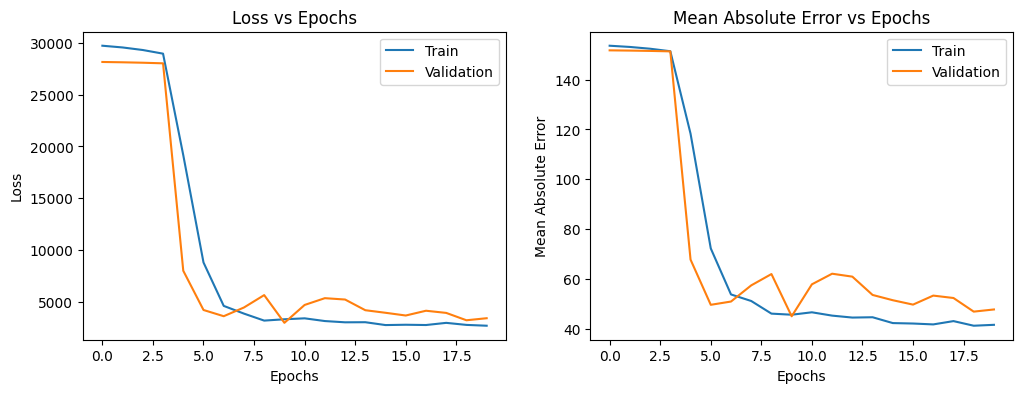

In [62]:
# Plot the learning curves 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

frame = pd.DataFrame(new_history.history)
epochs = np.arange(len(frame))

fig = plt.figure(figsize=(12,4))

# Loss plot
ax = fig.add_subplot(121)
ax.plot(epochs, frame['loss'], label="Train")
ax.plot(epochs, frame['val_loss'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Loss vs Epochs")
ax.legend()

# Accuracy plot
ax = fig.add_subplot(122)
ax.plot(epochs, frame['mae'], label="Train")
ax.plot(epochs, frame['val_mae'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Mean Absolute Error")
ax.set_title("Mean Absolute Error vs Epochs")
ax.legend()

#### 1.3.7 Early stopping and patience

In [63]:
'''
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Conv1D(16, 5, activation = 'relu', input_shape = (128, 1)),
    MaxPooling1D(4),
    Flatten(),
    Dense(10, activation = 'softmax')
])
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

early_stopping = EarlyStopping(monitor = 'var_accuracy', patience = 5, min_delta = 0.01, mode = 'max')

model.fit(X_train, y_train, validation_split = 0.2, epochs = 10, callbacks=[early_stopping])
'''

NameError: name 'X_train' is not defined

- Re-train the models with early stopping

In [64]:
# re-train the unregularized model

unregularized_model = get_model()
unregularized_model.compile(
    optimizer = 'adam',
    loss = 'mae'
)
unreg_history = unregularized_model.fit(train_data, train_targets, epochs = 100, validation_split = 0.15, batch_size = 64, verbose = False,
                                        callbacks = [tf.keras.callbacks.EarlyStopping()])

In [65]:
# Evaluate the model on the test set

unregularized_model.evaluate(test_data, test_targets, verbose=2)

2/2 - 0s - loss: 52.1831 - 21ms/epoch - 11ms/step


52.18314743041992

In [66]:
# Re-train the regularized model

regularized_model = get_regularized_model(1e-8, 0.2)
regularized_model.compile(optimizer = 'adam', loss = 'mae')
reg_history = regularized_model.fit(train_data, train_targets, epochs=10, validation_split = 0.15, batch_size = 64, verbose = False,
                                    callbacks = [tf.keras.callbacks.EarlyStopping()])

In [67]:
# Evaluate the model on the test set

regularized_model.evaluate(test_data, test_targets, verbose=2)

2/2 - 0s - loss: 54.0338 - 20ms/epoch - 10ms/step


54.03384780883789